In [2]:
import pickle
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
# cluster with ward (2 clusters)
from sklearn.cluster import AgglomerativeClustering

In [3]:
# get the data from the relevant pickle file
hour = 'Hour15'
infile = open('/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/pickel_files/' + hour,'rb')
pc_pymat = pickle.load(infile)
infile.close()
time_window_hours = 1
time_window_ms = time_window_hours * 60.0 * 60 * 1000

In [4]:
# preform fourie transform using welch  
freq_power = []
t = range(3600)
for i in t:
    single_bin = pc_pymat[i * 20000:20000*(i+1)]
    f, Pxx_den = signal.welch(single_bin, 20000, nperseg=2000, noverlap=1000, scaling='spectrum')
    freq_power.append(Pxx_den)

freq_power = np.array(freq_power)

In [5]:
f[1]

10.0

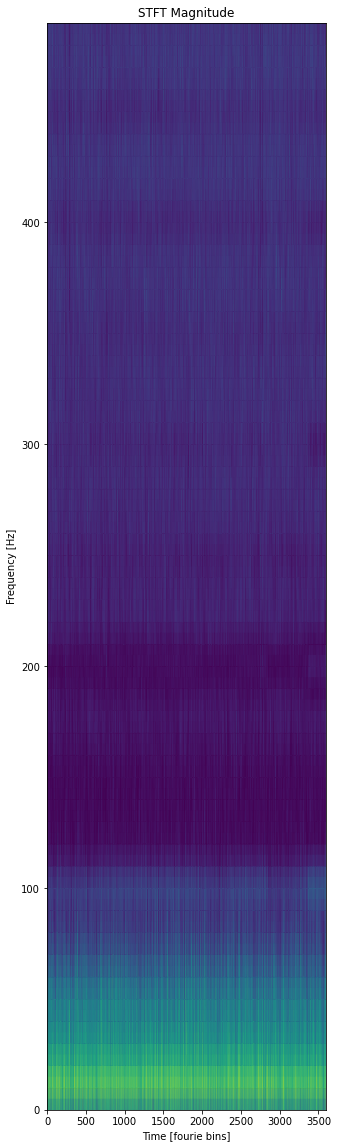

In [6]:
# plot spectogram before processing it
plt.figure(figsize=(5,20))
plt.pcolormesh(t, f[:50], np.abs(np.log(np.transpose(freq_power[:,:50]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()
#H14_H15

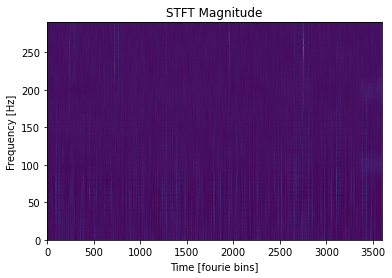

In [7]:
# normalized spectogram data - norm power of each frequency with it's avarage power
low_freq_power = freq_power[:,:30]
avg_freq_power = np.array([0.0]*30)
# calculate avarage power of the freq
for i in range(30):
    avg_freq_power[i] = sum(low_freq_power[:,i]) / low_freq_power.shape[0]
    
# create the normalized matrix
norm_freq_power = []
for seg in low_freq_power:
    new_seg = np.array([0.0]*30)
    for i in range(30):
        new_seg[i] = seg[i] / avg_freq_power[i]
    norm_freq_power.append(new_seg)
    
norm_freq_power = np.array(norm_freq_power)

# segmentation and plot
plt.pcolormesh(t, f[:30], np.abs((np.transpose(norm_freq_power))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

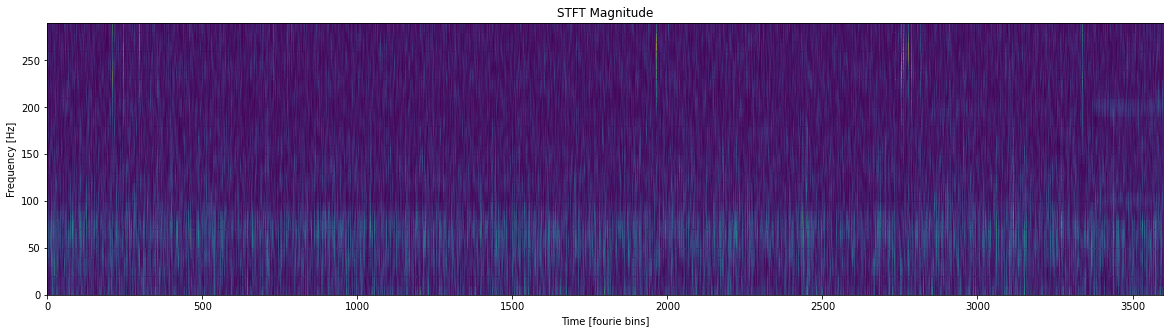

In [8]:
# segmentation and plot
plt.figure(figsize=(20,5))
plt.pcolormesh(t, f[:30], np.abs(np.log(np.transpose(norm_freq_power))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

In [8]:
# freq_power[:,:30]

In [10]:
# for i in range(15)

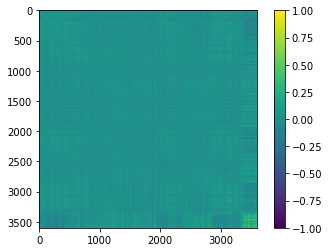

In [11]:
# create the correlation matrix
low_freq_magnitudes = np.abs(norm_freq_power)
# compute correlation matrix of frequencies magnitudes
corr_mat = np.corrcoef(low_freq_magnitudes) #by pearson
corr_mat.shape
plt.imshow(corr_mat)
plt.clim(-1,1)
plt.colorbar()

In [12]:
# re-organize the segments according to clusters
ward_clusters = AgglomerativeClustering().fit(corr_mat)
indices = np.argsort(ward_clusters.labels_)
magnitudes_by_clusters = low_freq_magnitudes[indices]
corr_mat_by_clusters = np.corrcoef(magnitudes_by_clusters)
corr_mat_by_clusters.shape
# plt.imshow(corr_mat_by_clusters)
# plt.clim(-1,1)
# plt.colorbar()

(3600, 3600)

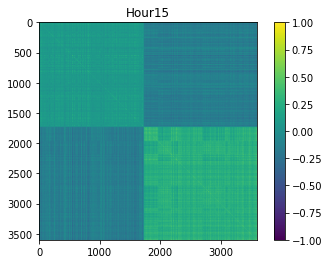

In [13]:
plt.title(hour)
plt.imshow(corr_mat_by_clusters)
plt.clim(-1,1)
plt.colorbar()

In [14]:
# divide the data to two clusters
lables = ward_clusters.labels_
indxes_cls1 = np.where(lables == 0)[0]
indxes_cls2 = np.where(lables == 1)[0]
cls1 = low_freq_magnitudes[indxes_cls1, :]
cls2 = low_freq_magnitudes[indxes_cls2, :]

#cal the freqs
def avrg_freq_per_cluster(cls_group):
    cls_len = cls_group.shape[0]
    relevant_freqs = cls_group.shape[1]
    cls_freqs = [0]*relevant_freqs
    for vec in cls_group:
        for i in range(relevant_freqs):
            cls_freqs[i] += vec[i]

    cls_freqs =  np.divide(cls_freqs,cls_len)
    return cls_freqs

# plot the graph
def show_graph(cls1_freqs, cls2_freqs):
    plt.plot(f[:30],cls1_freqs)
    plt.plot(f[:30],cls2_freqs)
    plt.title('nPSD of Each Cluster as Function of the Frequency')
    plt.ylabel('nPSD')
    plt.xlabel('Frequency [Hz]')
    plt.show()

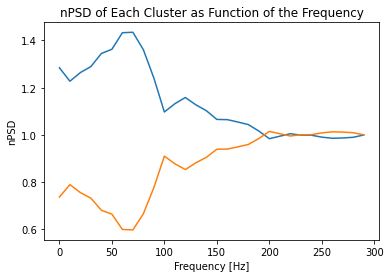

In [15]:
plt.title(hour)
show_graph(avrg_freq_per_cluster(cls1), avrg_freq_per_cluster(cls2))

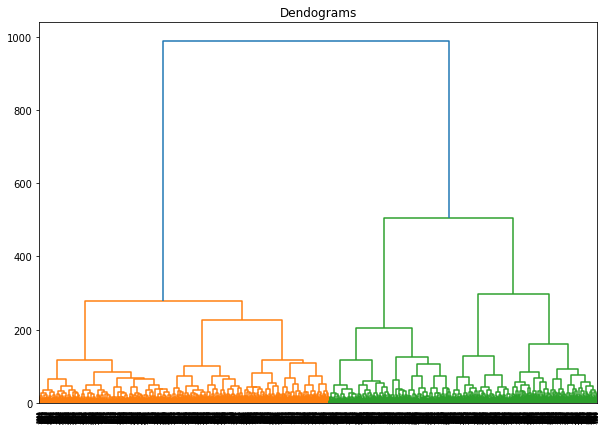

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(corr_mat, method='ward'))

In [18]:
# cls2

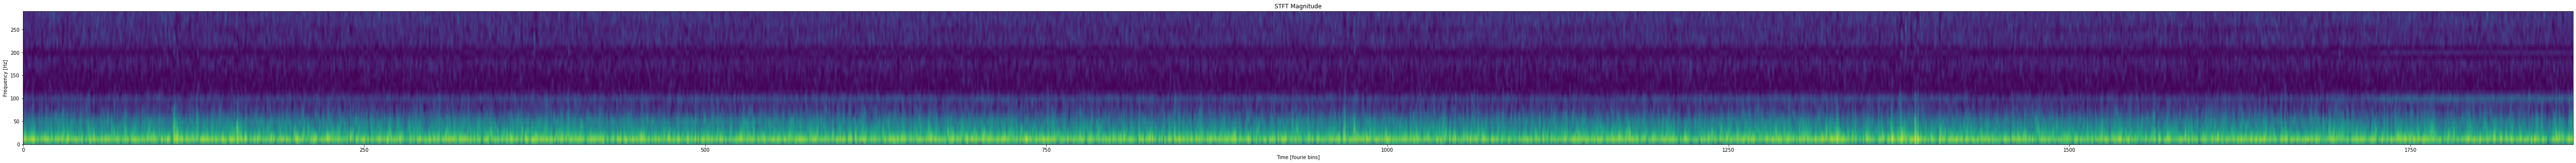

In [19]:
plt.figure(figsize=(len(indxes_cls2) / 20,5))
plt.pcolormesh([i for i in range(len(indxes_cls2))], f[:30], np.abs(np.log(np.transpose(freq_power[indxes_cls2,:30]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

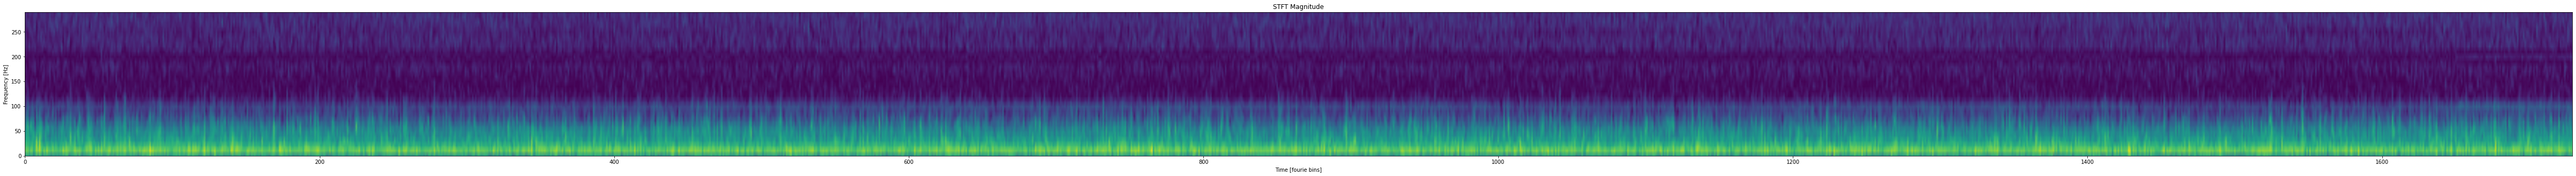

In [20]:
plt.figure(figsize=(len(indxes_cls1) / 20,5))
plt.pcolormesh([i for i in range(len(indxes_cls1))], f[:30], np.abs(np.log(np.transpose(freq_power[indxes_cls1,:30]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

# all data graph

In [21]:
# get the data from the relevant pickle file
def get_data(hour): 
    infile = open('/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/pickel_files/Hour' + str(hour),'rb')
    pc_pymat = pickle.load(infile)
    infile.close()
    return pc_pymat

#welch and norm
def welch_norm(pc_pymat):
    # preform fourie transform using welch 
    freq_power = []
    t = range(3600)
    for i in t:
        single_bin = pc_pymat[i * 20000:20000*(i+1)]
        f, Pxx_den = signal.welch(single_bin, 20000, nperseg=2000, noverlap=1000, scaling='spectrum')
        freq_power.append(Pxx_den)

    freq_power = np.array(freq_power)
    
    # normalized spectogram data - norm power of each frequency with it's avarage power
    low_freq_power = freq_power[:,:30]
    avg_freq_power = np.array([0.0]*30)
    # calculate avarage power of the freq
    for i in range(30):
        avg_freq_power[i] = sum(low_freq_power[:,i]) / low_freq_power.shape[0]

    # create the normalized matrix
    norm_freq_power = []
    for seg in low_freq_power:
        new_seg = np.array([0.0]*30)
        for i in range(30):
            new_seg[i] = seg[i] / avg_freq_power[i]
        norm_freq_power.append(new_seg)

    norm_freq_power = np.array(norm_freq_power)
    return f, norm_freq_power

def correlate_cluster_mat(norm_freq_power):
    # create the correlation matrix
    low_freq_magnitudes = np.abs(norm_freq_power)
    # compute correlation matrix of frequencies magnitudes
    corr_mat = np.corrcoef(low_freq_magnitudes) #by pearson
    
    # re-organize the segments according to clusters
    ward_clusters = AgglomerativeClustering().fit(corr_mat)
    indices = np.argsort(ward_clusters.labels_)
    magnitudes_by_clusters = low_freq_magnitudes[indices]
    corr_mat_by_clusters = np.corrcoef(magnitudes_by_clusters)
    
    # divide the data to two clusters
    lables = ward_clusters.labels_
    indxes_cls1 = np.where(lables == 0)[0]
    indxes_cls2 = np.where(lables == 1)[0]
    cls1 = low_freq_magnitudes[indxes_cls1, :]
    cls2 = low_freq_magnitudes[indxes_cls2, :]
    
    return cls1, cls2

#cal the freqs
def avrg_freq_per_cluster(cls_group):
    cls_len = cls_group.shape[0]
    relevant_freqs = cls_group.shape[1]
    cls_freqs = [0]*relevant_freqs
    for vec in cls_group:
        for i in range(relevant_freqs):
            cls_freqs[i] += vec[i]

    cls_freqs =  np.divide(cls_freqs,cls_len)
    return cls_freqs

# plot the graph
def show_graph(f, cls1_freqs, cls2_freqs):
    plt.plot(f[:30],cls1_freqs)
    plt.plot(f[:30],cls2_freqs)
    plt.title('nPSD of Each Cluster as Function of the Frequency')
    plt.ylabel('nPSD')
    plt.xlabel('Frequency [Hz]')
    plt.show()

In [22]:
def average_all_relevant_hours(start_hour, stop_hour):
    cls_higher_than_1 = [0]*30
    cls_lower_than_1 = [0]*30

    for i in range(start_hour, stop_hour + 1):
        pc_pymat = get_data(i)
        f, norm_freq_power = welch_norm(pc_pymat)
        cls1, cls2 = correlate_cluster_mat(norm_freq_power)
        cls1_freqs = avrg_freq_per_cluster(cls1)
        cls2_freqs = avrg_freq_per_cluster(cls2)
        if cls1_freqs[0] > 1:
            cls_higher_than_1 = cls_higher_than_1 + cls1_freqs
            cls_lower_than_1 = cls_lower_than_1 + cls2_freqs
        if cls1_freqs[0] < 1:
            cls_higher_than_1 = cls_higher_than_1 + cls2_freqs
            cls_lower_than_1 = cls_lower_than_1 + cls1_freqs
         
    hours_num = stop_hour + 1 - start_hour
    cls_higher_than_1 =  np.divide(cls_higher_than_1,hours_num)
    cls_lower_than_1 =  np.divide(cls_lower_than_1,hours_num)
    
    return f, cls_higher_than_1, cls_lower_than_1


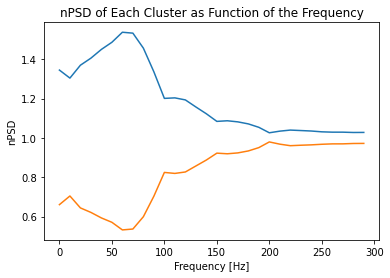

In [23]:
# sleep average frequency power
f, cls_higher_than_1, cls_lower_than_1 = average_all_relevant_hours(2,10)
show_graph(f, cls_higher_than_1, cls_lower_than_1)

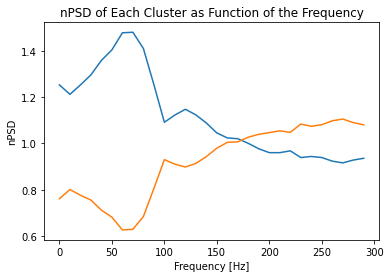

In [24]:
# wakfullness average frequency power
f, cls_higher_0_1, cls_lower_0_1 = average_all_relevant_hours(0,1)
f, cls_higher_12_15, cls_lower_12_15 = average_all_relevant_hours(12,15)

cls_higher_than_1 = cls_higher_0_1 * (2/6) + cls_higher_12_15 * (4/6)
cls_lower_than_1 = cls_lower_0_1 * (2/6) + cls_lower_12_15 * (4/6)

show_graph(f, cls_higher_than_1, cls_lower_than_1)

In [36]:
# cls_higher_than_1[18]

In [37]:
# cls_lower_than_1[18]

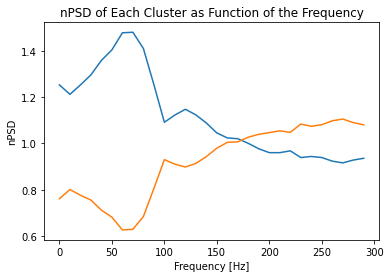

In [25]:
cls_higher_than_1 = cls_higher_0_1 * (2/6) + cls_higher_12_15 * (4/6)
cls_lower_than_1 = cls_lower_0_1 * (2/6) + cls_lower_12_15 * (4/6)

show_graph(f, cls_higher_than_1, cls_lower_than_1)

# 1Hz investigation in wakefulness

In [10]:
# get the data from the relevant pickle file
def get_data(hour): 
    infile = open('/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/pickel_files/Hour' + str(hour),'rb')
    pc_pymat = pickle.load(infile)
    infile.close()
    return pc_pymat

#welch and norm
def welch_norm(pc_pymat):
    # preform fourie transform using welch 
    freq_power = []
    t = range(360)
    for i in t:
        single_bin = pc_pymat[i * 200000:200000*(i+1)]
        f, Pxx_den = signal.welch(single_bin, 20000, nperseg=20000, noverlap=10000, scaling='spectrum')
        freq_power.append(Pxx_den)

    freq_power = np.array(freq_power)

    # normalized spectogram data - norm power of each frequency with it's avarage power
    low_freq_power = freq_power[:,:30]
    avg_freq_power = np.array([0.0]*30)
    # calculate avarage power of the freq
    for i in range(30):
        avg_freq_power[i] = sum(low_freq_power[:,i]) / low_freq_power.shape[0]

    # create the normalized matrix
    norm_freq_power = []
    for seg in low_freq_power:
        new_seg = np.array([0.0]*30)
        for i in range(30):
            new_seg[i] = seg[i] / avg_freq_power[i]
        norm_freq_power.append(new_seg)

    norm_freq_power = np.array(norm_freq_power)
    return f, norm_freq_power

def correlate_cluster_mat(norm_freq_power):
    # create the correlation matrix
    low_freq_magnitudes = np.abs(norm_freq_power)
    # compute correlation matrix of frequencies magnitudes
    corr_mat = np.corrcoef(low_freq_magnitudes) #by pearson
    
    # re-organize the segments according to clusters
    ward_clusters = AgglomerativeClustering().fit(corr_mat)
    indices = np.argsort(ward_clusters.labels_)
    magnitudes_by_clusters = low_freq_magnitudes[indices]
    corr_mat_by_clusters = np.corrcoef(magnitudes_by_clusters)
    
    # divide the data to two clusters
    lables = ward_clusters.labels_
    indxes_cls1 = np.where(lables == 0)[0]
    indxes_cls2 = np.where(lables == 1)[0]
    cls1 = low_freq_magnitudes[indxes_cls1, :]
    cls2 = low_freq_magnitudes[indxes_cls2, :]
    
    return cls1, cls2

#cal the freqs
def avrg_freq_per_cluster(cls_group):
    cls_len = cls_group.shape[0]
    relevant_freqs = cls_group.shape[1]
    cls_freqs = [0]*relevant_freqs
    for vec in cls_group:
        for i in range(relevant_freqs):
            cls_freqs[i] += vec[i]

    cls_freqs =  np.divide(cls_freqs,cls_len)
    return cls_freqs

# plot the graph
def show_graph(f, cls1_freqs, cls2_freqs):
    plt.plot(f[:30],cls1_freqs)
    plt.plot(f[:30],cls2_freqs)
    plt.show()

In [6]:
pc_pymat = get_data(14)

In [11]:
f, norm_freq_power = welch_norm(pc_pymat)
cls1, cls2 = correlate_cluster_mat(norm_freq_power)

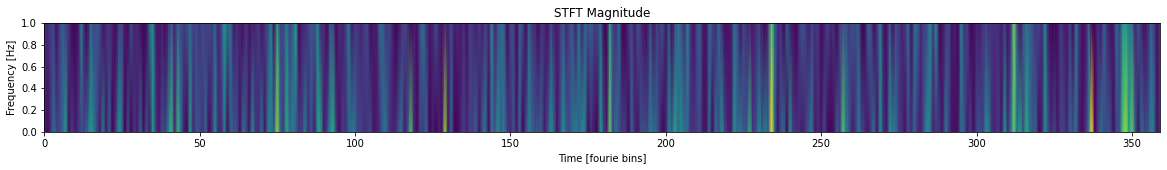

In [19]:
# segmentation and plot
plt.figure(figsize=(20,2))
plt.pcolormesh(range(norm_freq_power.shape[0]), f[:2], np.abs(np.log(np.transpose(norm_freq_power[:,:2]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()

In [24]:
after_sleep_awake = []
for i in range(12,15):
    pc_pymat = get_data(i)
    f, norm_freq_power = welch_norm(pc_pymat)
    after_sleep_awake.extend(norm_freq_power)
after_sleep_awake = np.array(after_sleep_awake)

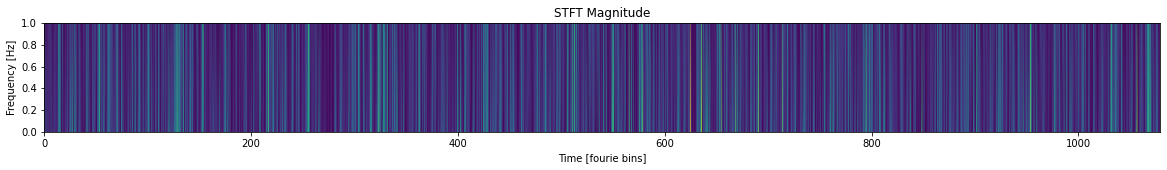

In [25]:
# segmentation and plot
plt.figure(figsize=(20,2))
plt.pcolormesh(range(after_sleep_awake.shape[0]), f[:2], np.abs(np.log(np.transpose(after_sleep_awake[:,:2]))), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [fourie bins]')
plt.show()